**Prodigy InfoTech Internship: Task 3**

**Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset deom the UCI Machine Learning Repository.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report)
import warnings
warnings.filterwarnings('ignore')

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


**Load the Dataset**

In [ ]:
url = "bank-additional.csv"

# Read the CSV file (note: this dataset uses semicolon as separator)
df = pd.read_csv(url, sep=';')

print("✓ Dataset loaded successfully!")
print(f"Dataset Shape: {df.shape}")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")


✓ Dataset loaded successfully!
Dataset Shape: (4119, 21)
Rows: 4119, Columns: 21


**EDA**

In [ ]:
# Display first few rows
print("\n--- First 5 Rows ---")
print(df.head())

# Display dataset information
print("\n--- Dataset Information ---")
print(df.info())

# Check for missing values
print("\n--- Missing Values ---")
print(df.isnull().sum())

# Display statistical summary
print("\n--- Statistical Summary ---")
print(df.describe())

# Check target variable distribution
print("\n--- Target Variable Distribution ---")
print(df['y'].value_counts())
print(df['y'].value_counts(normalize=True) * 100)


--- First 5 Rows ---
   age          job  marital          education default  housing     loan  \
0   30  blue-collar  married           basic.9y      no      yes       no   
1   39     services   single        high.school      no       no       no   
2   25     services  married        high.school      no      yes       no   
3   38     services  married           basic.9y      no  unknown  unknown   
4   47       admin.  married  university.degree      no      yes       no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0   cellular   may         fri  ...         2    999         0  nonexistent   
1  telephone   may         fri  ...         4    999         0  nonexistent   
2  telephone   jun         wed  ...         1    999         0  nonexistent   
3  telephone   jun         fri  ...         3    999         0  nonexistent   
4   cellular   nov         mon  ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.con

**DATA VISUALIZATION**

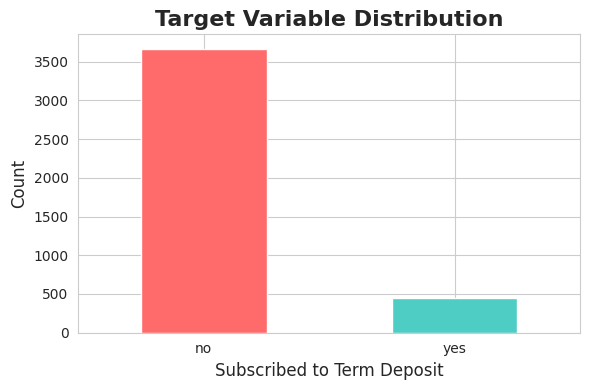

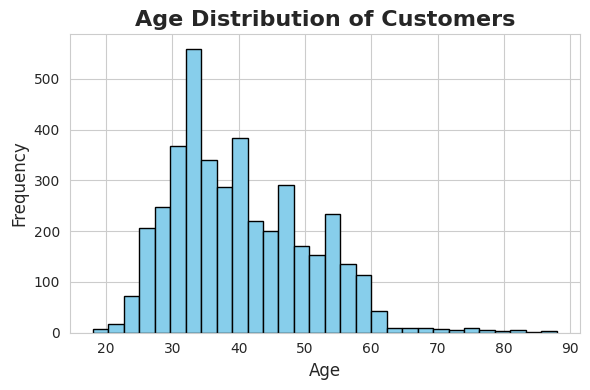

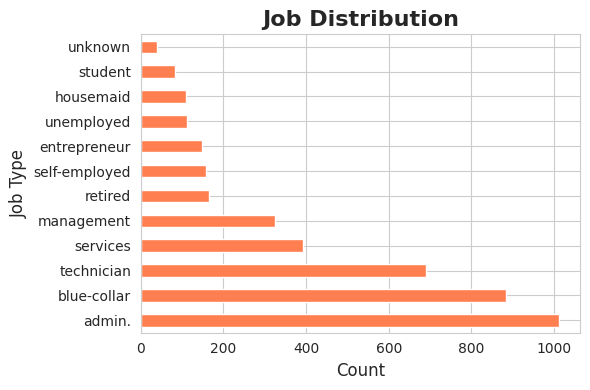

<Figure size 600x400 with 0 Axes>

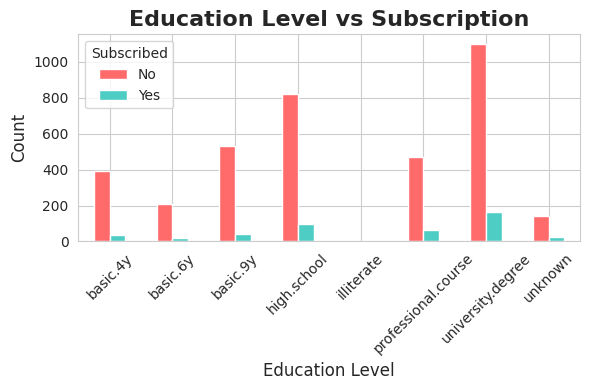

✓ Visualizations saved!


In [ ]:
# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (6, 4)

# Visualization 1: Target Variable Distribution
plt.figure(figsize=(6, 4))
df['y'].value_counts().plot(kind='bar', color=['#FF6B6B', '#4ECDC4'])
plt.title('Target Variable Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Subscribed to Term Deposit', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('1_target_distribution.png', dpi=300)
plt.show()

# Visualization 2: Age Distribution
plt.figure(figsize=(6, 4))
df['age'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Customers', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.savefig('2_age_distribution.png', dpi=300)
plt.show()

# Visualization 3: Job Distribution
plt.figure(figsize=(6, 4))
df['job'].value_counts().plot(kind='barh', color='coral')
plt.title('Job Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Job Type', fontsize=12)
plt.tight_layout()
plt.savefig('3_job_distribution.png', dpi=300)
plt.show()

# Visualization 4: Education vs Target
plt.figure(figsize=(6, 4))
pd.crosstab(df['education'], df['y']).plot(kind='bar', color=['#FF6B6B', '#4ECDC4'])
plt.title('Education Level vs Subscription', fontsize=16, fontweight='bold')
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(['No', 'Yes'], title='Subscribed')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('4_education_vs_target.png', dpi=300)
plt.show()

print("✓ Visualizations saved!")

**FEATURE ENGINEERING & DATA PREPROCESSING**

In [ ]:
# Create a copy of the dataframe
df_processed = df.copy()

# Identify column types
print("\n--- Column Types ---")
categorical_cols = df_processed.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df_processed.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Categorical Columns ({len(categorical_cols)}): {categorical_cols}")
print(f"Numerical Columns ({len(numerical_cols)}): {numerical_cols}")

# Remove target variable from categorical columns
categorical_cols.remove('y')

# Encode categorical variables using Label Encoding
print("\n--- Encoding Categorical Variables ---")
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le
    print(f"✓ Encoded: {col}")

# Encode target variable
le_target = LabelEncoder()
df_processed['y'] = le_target.fit_transform(df_processed['y'])
print(f"\n✓ Target Variable Encoding: {dict(zip(le_target.classes_, le_target.transform(le_target.classes_)))}")

print("\n--- Processed Dataset ---")
print(df_processed.head())




--- Column Types ---
Categorical Columns (11): ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
Numerical Columns (10): ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

--- Encoding Categorical Variables ---
✓ Encoded: job
✓ Encoded: marital
✓ Encoded: education
✓ Encoded: default
✓ Encoded: housing
✓ Encoded: loan
✓ Encoded: contact
✓ Encoded: month
✓ Encoded: day_of_week
✓ Encoded: poutcome

✓ Target Variable Encoding: {'no': np.int64(0), 'yes': np.int64(1)}

--- Processed Dataset ---
   age  job  marital  education  default  housing  loan  contact  month  \
0   30    1        1          2        0        2     0        0      6   
1   39    7        2          3        0        0     0        1      6   
2   25    7        1          3        0        2     0        1      4   
3   38    7        1          2        0        1     1   

**PREPARE DATA FOR MODELING**

In [ ]:
# Separate features (X) and target (y)
X = df_processed.drop('y', axis=1)
y = df_processed['y']

print(f"\nFeatures Shape: {X.shape}")
print(f"Target Shape: {y.shape}")

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"\n--- Data Split ---")
print(f"Training Set: {X_train.shape}")
print(f"Testing Set: {X_test.shape}")
print(f"\nTraining Target Distribution:")
print(pd.Series(y_train).value_counts())
print(f"\nTesting Target Distribution:")
print(pd.Series(y_test).value_counts())


Features Shape: (4119, 20)
Target Shape: (4119,)

--- Data Split ---
Training Set: (3295, 20)
Testing Set: (824, 20)

Training Target Distribution:
y
0    2934
1     361
Name: count, dtype: int64

Testing Target Distribution:
y
0    734
1     90
Name: count, dtype: int64


In [ ]:
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)

num_cols = df.select_dtypes(exclude='object').columns
print(num_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


                     age  duration  campaign     pdays  previous  \
age             1.000000  0.041299 -0.014169 -0.043425  0.050931   
duration        0.041299  1.000000 -0.085348 -0.046998  0.025724   
campaign       -0.014169 -0.085348  1.000000  0.058742 -0.091490   
pdays          -0.043425 -0.046998  0.058742  1.000000 -0.587941   
previous        0.050931  0.025724 -0.091490 -0.587941  1.000000   
emp.var.rate   -0.019192 -0.028848  0.176079  0.270684 -0.415238   
cons.price.idx -0.000482  0.016672  0.145021  0.058472 -0.164922   
cons.conf.idx   0.098135 -0.034745  0.007882 -0.092090 -0.051420   
euribor3m      -0.015033 -0.032329  0.159435  0.301478 -0.458851   
nr.employed    -0.041936 -0.044218  0.161037  0.381983 -0.514853   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                -0.019192       -0.000482       0.098135  -0.015033   
duration           -0.028848        0.016672      -0.034745  -0.032329   
campaign            0.176079 

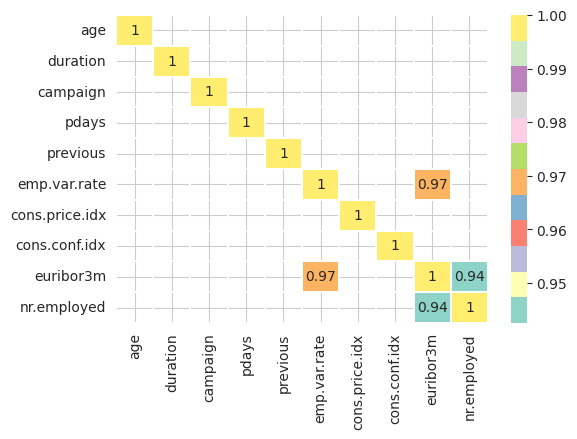

In [ ]:
# Exclude non-numeric columns
numeric_df = df.drop(columns=cat_cols)

# Compute the correlation matrix
corr = numeric_df.corr()

# Print the correlation matrix
print(corr)

# Filter correlations with absolute value >= 0.90
corr = corr[abs(corr) >= 0.90]

sns.heatmap(corr,annot=True,cmap='Set3',linewidths=0.2)
plt.show()

** BUILD DECISION TREE MODEL**

In [ ]:
print("\n--- Building Decision Tree Classifier ---")

# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(
    criterion='gini',           # Splitting criterion
    max_depth=10,               # Maximum depth of tree
    min_samples_split=50,       # Minimum samples to split a node
    min_samples_leaf=20,        # Minimum samples at leaf node
    random_state=32            # For reproducibility
)

# Train the model
dt_model.fit(X_train, y_train)
print("✓ Decision Tree Model trained successfully!")

# Display model parameters
print("\n--- Model Parameters ---")
print(f"Max Depth: {dt_model.max_depth}")
print(f"Number of Leaves: {dt_model.get_n_leaves()}")
print(f"Tree Depth: {dt_model.get_depth()}")



--- Building Decision Tree Classifier ---
✓ Decision Tree Model trained successfully!

--- Model Parameters ---
Max Depth: 10
Number of Leaves: 46
Tree Depth: 10


**Make Prediction**

In [ ]:
print("\n--- Making Predictions ---")

# Predictions on training set
y_train_pred = dt_model.predict(X_train)
print("✓ Training predictions completed")

# Predictions on testing set
y_test_pred = dt_model.predict(X_test)
print("✓ Testing predictions completed")



--- Making Predictions ---
✓ Training predictions completed
✓ Testing predictions completed


In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df_encoded = df.apply(lb.fit_transform)
df_encoded

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,12,1,1,2,0,2,0,0,6,0,...,1,20,0,1,3,8,4,156,6,0
1,21,7,2,3,0,0,0,1,6,0,...,3,20,0,1,8,18,16,207,8,0
2,7,7,1,3,0,2,0,1,4,4,...,0,20,0,1,9,23,8,225,10,0
3,20,7,1,2,0,1,1,1,4,0,...,2,20,0,1,9,23,8,222,10,0
4,29,0,1,6,0,2,0,0,7,1,...,0,20,0,1,7,11,7,201,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,12,0,1,1,0,2,2,0,3,2,...,0,20,0,1,9,17,6,221,10,0
4115,21,0,1,3,0,2,0,1,3,0,...,0,20,0,1,9,17,6,222,10,0
4116,9,8,2,3,0,0,0,0,6,1,...,1,20,1,0,3,8,4,160,6,0
4117,40,0,1,3,0,0,0,0,1,0,...,0,20,0,1,9,13,17,229,10,0


**Model Evaluation**

In [ ]:

print("\n" + "="*60)
print("MODEL PERFORMANCE EVALUATION")
print("="*60)

# Training Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"\nTraining Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")

# Testing Metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print(f"\n--- Testing Set Performance ---")
print(f"Accuracy:  {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Precision: {test_precision:.4f}")
print(f"Recall:    {test_recall:.4f}")
print(f"F1-Score:  {test_f1:.4f}")

# Confusion Matrix
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_test_pred)
print(cm)
print(f"\nTrue Negatives:  {cm[0][0]}")
print(f"False Positives: {cm[0][1]}")
print(f"False Negatives: {cm[1][0]}")
print(f"True Positives:  {cm[1][1]}")

# Classification Report
print("\n--- Detailed Classification Report ---")
print(classification_report(y_test, y_test_pred, target_names=['No', 'Yes']))



MODEL PERFORMANCE EVALUATION

Training Accuracy: 0.9272 (92.72%)

--- Testing Set Performance ---
Accuracy:  0.9090 (90.90%)
Precision: 0.6316
Recall:    0.4000
F1-Score:  0.4898

--- Confusion Matrix ---
[[713  21]
 [ 54  36]]

True Negatives:  713
False Positives: 21
False Negatives: 54
True Positives:  36

--- Detailed Classification Report ---
              precision    recall  f1-score   support

          No       0.93      0.97      0.95       734
         Yes       0.63      0.40      0.49        90

    accuracy                           0.91       824
   macro avg       0.78      0.69      0.72       824
weighted avg       0.90      0.91      0.90       824



**VISUALIZATION - CONFUSION MATRIX**

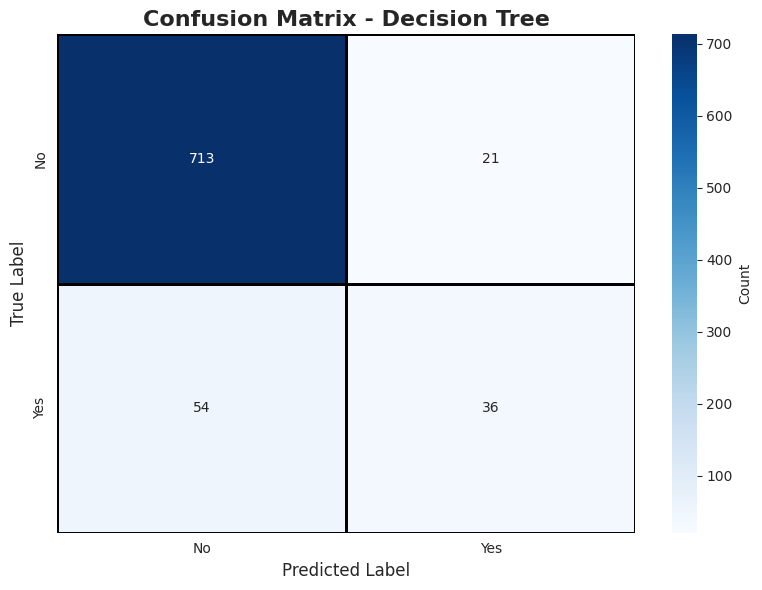

✓ Confusion Matrix visualization saved!


In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'],
            yticklabels=['No', 'Yes'],
            cbar_kws={'label': 'Count'},
            linewidths=2, linecolor='black')
plt.title('Confusion Matrix - Decision Tree', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.savefig('5_confusion_matrix.png', dpi=300)
plt.show()

print("✓ Confusion Matrix visualization saved!")


**FEATURE IMPORTANCE ANALYSIS**


--- Feature Importance Analysis ---

Top 10 Most Important Features:
       Feature  Importance
      duration    0.481163
   nr.employed    0.340024
     euribor3m    0.062699
         pdays    0.049763
           job    0.021210
 cons.conf.idx    0.018906
         month    0.008902
           age    0.005998
       housing    0.005718
cons.price.idx    0.001919


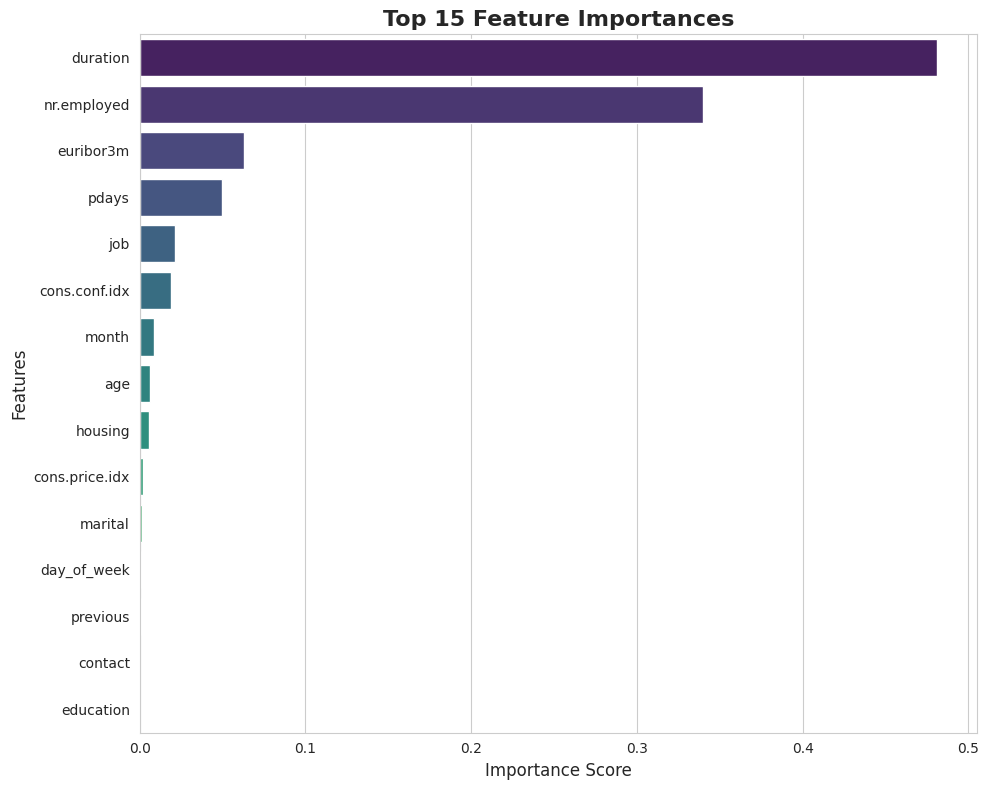

In [ ]:
print("\n--- Feature Importance Analysis ---")

# Get feature importance scores
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Display top 10 features
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10).to_string(index=False))

# Visualization: Feature Importance
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(15)
sns.barplot(data=top_features, x='Importance', y='Feature', palette='viridis')
plt.title('Top 15 Feature Importances', fontsize=16, fontweight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.savefig('6_feature_importance.png', dpi=300)
plt.show()


**VISUALIZE DECISION TREE**


--- Visualizing Decision Tree ---


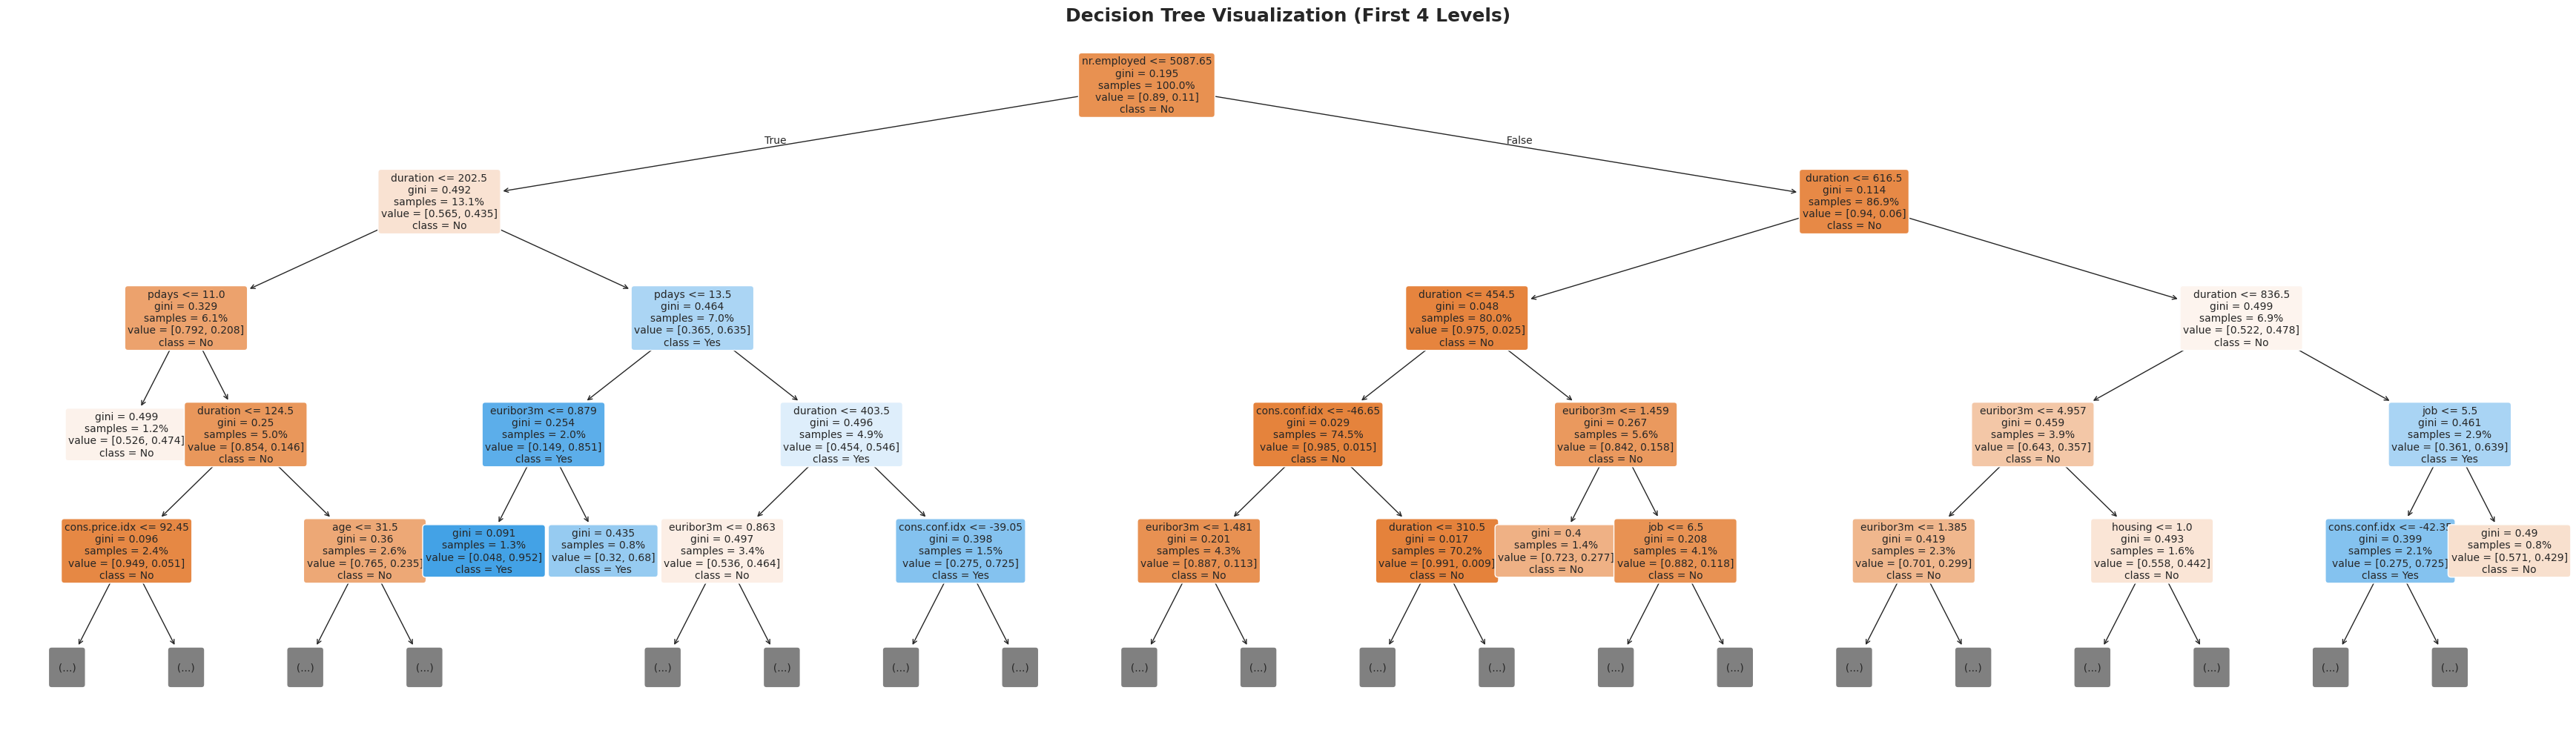

In [ ]:
print("\n--- Visualizing Decision Tree ---")

plt.figure(figsize=(35,10))
plot_tree(dt_model,
          feature_names=X.columns,
          class_names=['No', 'Yes'],
          filled=True,
          rounded=True,
          max_depth=4,              # Show first 4 levels for clarity
          fontsize=10,
          proportion=True)
plt.title('Decision Tree Visualization (First 4 Levels)', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.savefig('7_decision_tree.png', dpi=300, bbox_inches='tight')
plt.show()

**PREDICTIONS ON NEW DATA (EXAMPLE)**

In [ ]:
print("\n--- Example Prediction ---")

# Take a sample from test set
sample_data = X_test.iloc[0:1]
sample_prediction = dt_model.predict(sample_data)
sample_probability = dt_model.predict_proba(sample_data)

print("Sample Input:")
print(sample_data)
print(f"\nPrediction: {le_target.inverse_transform(sample_prediction)[0]}")
print(f"Probability [No, Yes]: {sample_probability[0]}")



--- Example Prediction ---
Sample Input:
      age  job  marital  education  default  housing  loan  contact  month  \
2925   41    1        1          1        0        0     0        0      0   

      day_of_week  duration  campaign  pdays  previous  poutcome  \
2925            0       412         1    999         1         0   

      emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
2925          -1.8          93.075          -47.1      1.405       5099.1  

Prediction: no
Probability [No, Yes]: [1. 0.]


**Final Summary**

In [ ]:

print("\n" + "="*40)
print("TASK-03 COMPLETED SUCCESSFULLY!")
print("="*40)
print("\n PROJECT SUMMARY:")
print(f"   • Dataset: Bank Marketing (UCI ML Repository)")
print(f"   • Total Samples: {len(df)}")
print(f"   • Number of Features: {X.shape[1]}")
print(f"   • Training Samples: {len(X_train)}")
print(f"   • Testing Samples: {len(X_test)}")
print(f"   • Model: Decision Tree Classifier")
print(f"   • Test Accuracy: {test_accuracy:.2%}")
print(f"   • F1-Score: {test_f1:.4f}")
print(f"   • Most Important Feature: {feature_importance.iloc[0]['Feature']}")
print("\n Generated Files:")
print("   • 1_target_distribution.png")
print("   • 2_age_distribution.png")
print("   • 3_job_distribution.png")
print("   • 4_education_vs_target.png")
print("   • 5_confusion_matrix.png")
print("   • 6_feature_importance.png")
print("   • 7_decision_tree.png")
print("   • decision_tree_model.pkl")
print("   • label_encoders.pkl")



TASK-03 COMPLETED SUCCESSFULLY!

 PROJECT SUMMARY:
   • Dataset: Bank Marketing (UCI ML Repository)
   • Total Samples: 4119
   • Number of Features: 20
   • Training Samples: 3295
   • Testing Samples: 824
   • Model: Decision Tree Classifier
   • Test Accuracy: 90.90%
   • F1-Score: 0.4898
   • Most Important Feature: duration

 Generated Files:
   • 1_target_distribution.png
   • 2_age_distribution.png
   • 3_job_distribution.png
   • 4_education_vs_target.png
   • 5_confusion_matrix.png
   • 6_feature_importance.png
   • 7_decision_tree.png
   • decision_tree_model.pkl
   • label_encoders.pkl
